### 1.1 O problema de negócio

Esse projeto tem por objetivo dar suporte e insumos para uma expansão do Airbnb em uma região, deixando as tomadas de decisão mais assetivas, com respaudo dos dados, o que deixa as ações menos arriscadas. Qualquer decisão errada por parte do CEO pode levar a empresa a ter um prejuízo enorme. Para diminuir o risco desse projeto, foi pedido um auxilio utilizando dados para responder algumas perguntas, que o ajudarão a tomar as melhores decisões comerciais e de marketing. As perguntas recebidas foram as seguintes:

### 1.2 As perguntas do CEO
1. Qual o valor médio do aluguel na cidade de Nova York?

2. Quais os nomes das regiões que existem na cidade de Nova York?

3. Qual o valor do aluguel diário mais caro da cidade de Nova York?

4. Quais são as categorias de imóveis que estão cadastradas dentro da base de dados da cidade de Nova York?

5. Quantos usuários (Hosts) únicos cadastrados existem dentro da base de dados da cidade de Nova York?

6. Como é a variação do preços dos imóveis em NY?

7. Existem mais imóveis baratos ou caros?

8. Qual a distribuição do número de Reviews? Existem imóveis com muitos e outro com poucos reviews?

9. Qual é o valor do aluguel (diária) mais caro de cada região da base de dados da cidade de Nova York?

10. Conseguimos saber onde estão localizados os imóveis com o valor do aluguel mais caro, na cidade de Nova York?

11. Conseguimos saber onde estão localizados os imóveis pelo seu tipo?


### 2.1. Planejamento do Processo

Quais são os passos para encontrar as respostas?

1. Coletar um conjunto de dados ( planilha de dados )

2. Manipular esses dados

a. Calcular a média de todos os valores de aluguel da cidade de Nova
York.

b. Contar todos os nomes distintos que aparecem na coluna região.

c. Encontrar o valor máximo da coluna que contém os valores dos
aluguéis


In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Giovanna\Documents\bases - CDS\AB_NYC_2019.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [84]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [85]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [87]:
# Filtrando apenas colunas numéricas
df_numeric = df.select_dtypes(include='number')
df_numeric

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,3647,4632,40.80902,-73.94190,150,3,0,NaN,1,365
3,3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,40.67853,-73.94995,70,2,0,NaN,2,9
48891,36485057,6570630,40.70184,-73.93317,40,4,0,NaN,2,36
48892,36485431,23492952,40.81475,-73.94867,115,10,0,NaN,1,27
48893,36485609,30985759,40.75751,-73.99112,55,1,0,NaN,6,2


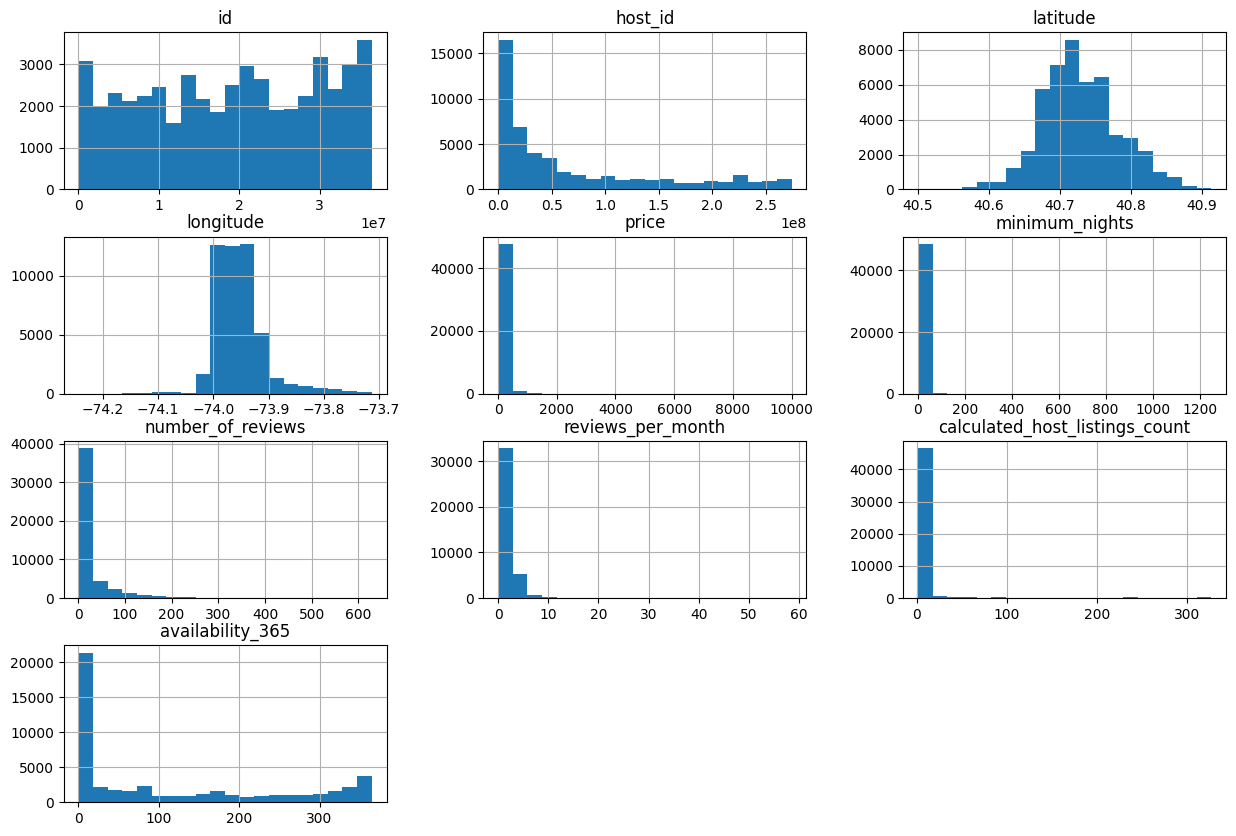

In [88]:
# Visualização da Distribuição das Variáveis
df_numeric.hist(bins=20, figsize=(15,10))
plt.show()

In [90]:
correlacao = df_numeric.corr()
correlacao

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


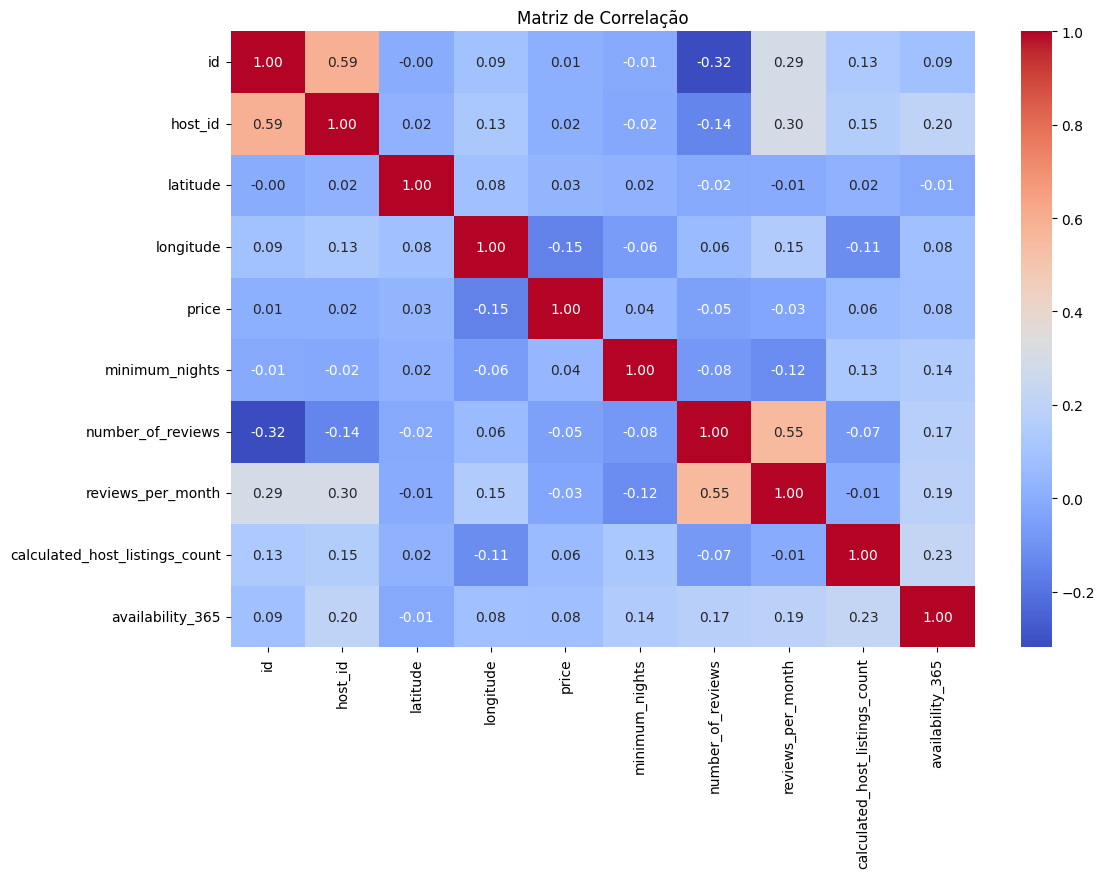

In [93]:
# Visualização da Correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

Não há muita correlação entre as variáveis

-----------------------------

 Podemos prever o preço do aluguel, dada algumas variáveis

In [4]:
# 1. Qual o valor médio do aluguel na cidade de Nova York?

# Selecionando a variável preço para encontrar o preço médio dos aluguéis
price = df.loc[:, 'price']
price

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

1. Qual o valor médio do aluguel na cidade de Nova York?

In [5]:
media_aluguel = np.mean(df.price)
print('O valor médio do aluguel é: U$', round(media_aluguel,2))

O valor médio do aluguel é: U$ 152.72


In [6]:
# calcular o valor medio do preco
valor_medio = round(np.mean(price),2)
# mostrar os valores
print('O valor médio dos aluguéis é: ' )
print('U$', valor_medio)

O valor médio dos aluguéis é: 
U$ 152.72


In [7]:
# selecionar a coluna região
regioes = df.loc[:, 'neighbourhood_group']

2. Quais os nomes das regiões que existem na cidade de Nova York?

In [8]:
regioes = df.neighbourhood_group.unique()
qtde = df.neighbourhood_group.value_counts().count()

In [9]:
print('Há {:.0f} regiões em Nova York, compostas por: {}'.format(qtde, regioes))

Há 5 regiões em Nova York, compostas por: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


In [10]:
# selecionar a coluna neighbourhood_group
regioes_unicas = pd.unique(regioes)
contagem = pd.value_counts(regioes_unicas).count()

print("Quantidade de regiões:", contagem)
print("Formadas por:", regioes_unicas)

Quantidade de regiões: 5
Formadas por: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


C:\Users\Giovanna\AppData\Local\Temp\ipykernel_4920\2710979326.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  contagem = pd.value_counts(regioes_unicas).count()


In [11]:
aluguel_caro = df.price.max()
aluguel_caro
print('O aluguel mais caro de Nova York é de: U$ {:.2f}'.format(aluguel_caro))

O aluguel mais caro de Nova York é de: U$ 10000.00


3. Qual o valor do aluguel diário mais caro da cidade de Nova York?

In [12]:
# c. Encontrar o valor máximo da coluna que contém os valores dos aluguéis

# 1. Selecionar as colunas alugueis
# 2. Encontrar o valor máximo dos aluguéis

preco_aluguel = df.loc[:, 'price']
preco_maximo = round(np.max(preco_aluguel),2)

In [13]:
# Respondendo pergunta
print("O preço máximo de aluguel é: U$", preco_maximo)

O preço máximo de aluguel é: U$ 10000


### Parte 2

4. Quais são as categorias de imóveis que estão cadastradas dentro da base de dados da cidade de Nova York?

5. Quantos usuários (Hosts) únicos cadastrados existem dentro da base de dados da cidade de Nova York?

6. Como é a variação do preços dos imóveis em NY?

7. Existem mais imóveis baratos ou caros?

8. Qual a distribuição do número de Reviews? Existem imóveis com muitos e outro com poucos reviews?

In [14]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


4. Quais são as categorias de imóveis que estão cadastradas dentro da base de dados da cidade de Nova York?

In [15]:
categorias = df.room_type.unique()
print('As categorias de imóveis são: {}'.format(categorias))

As categorias de imóveis são: ['Private room' 'Entire home/apt' 'Shared room']


5. Quantos usuários (Hosts) únicos cadastrados existem dentro da base de dados da cidade de Nova York?

In [16]:
# Contando distintamente por região os hosts existentes na base
contagem_distinta_host = df.host_id.nunique()
contagem_distinta_regiao = df.groupby('neighbourhood_group')['host_id'].nunique() # agrupamento dos IDs (host_id) pelas regiões (neighbourhood_group)

# Criando uma lista de strings com os bairros e suas contagens
bairros_contagens = ['{}: {}'.format(bairro, contagem) for bairro, contagem in contagem_distinta_regiao.items()]

print('Há {} usuários distintos, sendo distribuídos nas seguintes regiões: {}'.format(contagem_distinta_host, ", ".join(bairros_contagens)))


Há 37457 usuários distintos, sendo distribuídos nas seguintes regiões: Bronx: 789, Brooklyn: 15966, Manhattan: 16578, Queens: 3983, Staten Island: 256


6. Como é a variação do preços dos imóveis em NY?

In [17]:
df.price.mean()

152.7206871868289

In [18]:
variacao = round(df.price.std(), 2)

In [19]:
print("Dado o valor médio de aluguel, há uma variação de aproxiadamente U${}".format(variacao))

Dado o valor médio de aluguel, há uma variação de aproxiadamente U$240.15


7. Existem mais imóveis baratos ou caros?

In [20]:
df.price.max()

10000

In [21]:
df.price.min()

0

In [22]:
frequencia = df.price.value_counts()
frequencia.head(30)

price
100    2051
150    2047
50     1534
60     1458
200    1401
75     1370
80     1272
65     1190
70     1170
120    1130
125    1057
90     1021
250    1018
55      950
45      891
85      877
40      771
175     763
99      742
110     739
95      700
130     610
300     561
140     548
180     522
160     480
35      480
115     468
225     451
199     415
Name: count, dtype: int64

<Axes: >

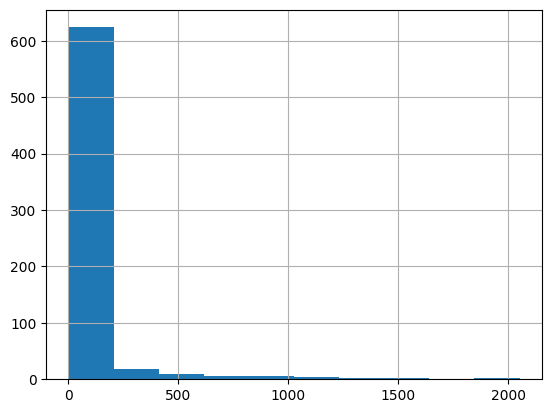

In [23]:
frequencia.hist()

In [24]:
linha = df.loc[:,'price'] < 1500
price = df.loc[linha, 'price']

In [25]:
from matplotlib import pyplot as plt

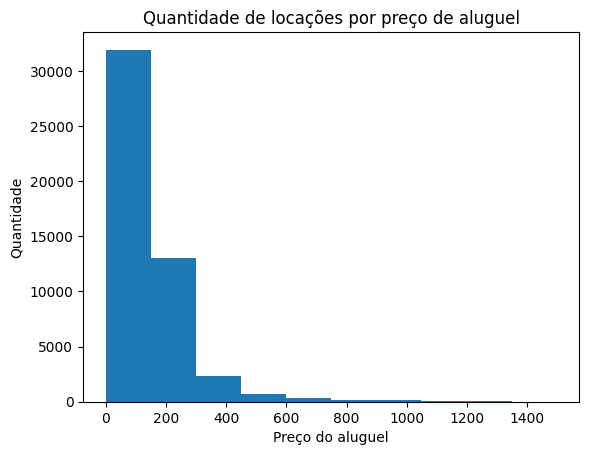

In [26]:
# Desenho do histograma com preço abaixo de U$ 1250
plt.hist(price, bins=10)

# Adicionando título ao eixo x
plt.xlabel('Preço do aluguel')

# Adicionando título ao eixo y
plt.ylabel('Quantidade')

# Adicionando título ao gráfico
plt.title('Quantidade de locações por preço de aluguel')

plt.show()

In [27]:
print('Existe mais de 30.000 imóveis com valor até U$100.00')

Existe mais de 30.000 imóveis com valor até U$100.00


8. Qual a distribuição do número de Reviews? Existem imóveis com muitos e outro com poucos reviews?

In [28]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [29]:
df.number_of_reviews.mean()

23.274465691788528

In [30]:
df.number_of_reviews.max()

629

In [31]:
df.number_of_reviews.min()

0

In [32]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [33]:
# Frequencia de Reviews
frequencia = df.number_of_reviews.value_counts()
frequencia

number_of_reviews
0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
313        1
540        1
480        1
326        1
341        1
Name: count, Length: 394, dtype: int64

<Axes: >

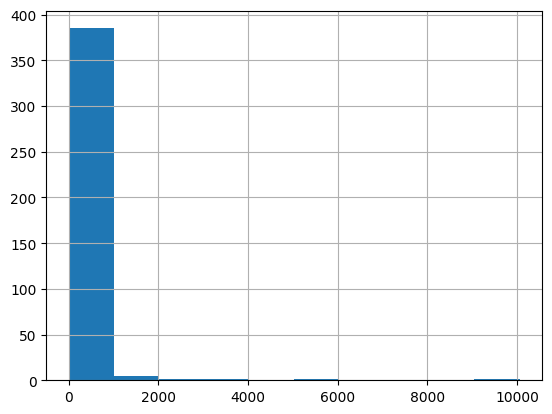

In [34]:
frequencia.hist()

In [35]:
linha = df.loc[:,'number_of_reviews'] < 250
reviews = df.loc[linha, 'number_of_reviews']

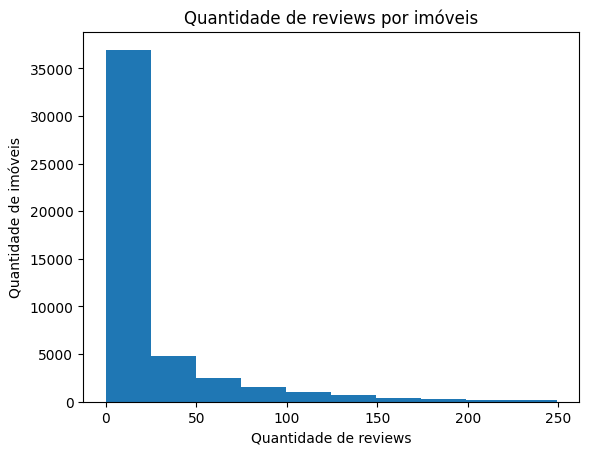

In [36]:
# Desenho do histograma com preço abaixo de U$ 1250
plt.hist(reviews, bins=10)

# Adicionando título ao eixo x
plt.xlabel('Quantidade de reviews')

# Adicionando título ao eixo y
plt.ylabel('Quantidade de imóveis')

# Adicionando título ao gráfico
plt.title('Quantidade de reviews por imóveis')

plt.show()

In [37]:
print('Existem mais de 35.000 imóveis com até 25 avaliações')

Existem mais de 35.000 imóveis com até 25 avaliações


# ---------------------

9. Qual é o valor do aluguel (diária) mais caro de cada região da base de dados da cidade de Nova York?

10. Conseguimos saber onde estão localizados os imóveis com o valor do aluguel mais caro, na cidade de Nova York?

11. Conseguimos saber onde estão localizados os imóveis pelo seu tipo?

In [38]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [58]:
import plotly.express as px

In [46]:
# 9. Qual é o valor do aluguel (diária) mais caro de cada região da base de dados da cidade de Nova York?
# Disponíveis para alugar

df_agrupado_caro = df[['price','neighbourhood_group']].groupby('neighbourhood_group')
df_plot_agrupado = df_agrupado_caro.max().reset_index()
df_plot_agrupado


,neighbourhood_group,price
0,Bronx,2500
1,Brooklyn,10000
2,Manhattan,10000
3,Queens,10000
4,Staten Island,5000


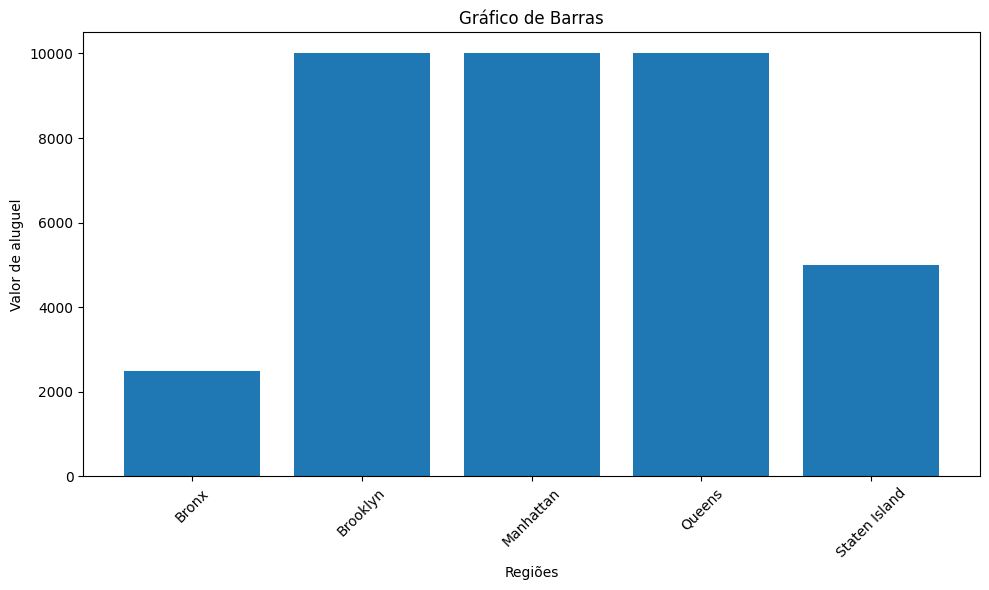

In [70]:
import matplotlib.pyplot as plt

# Agrupamento de dados
grupo_regiao = df_plot_agrupado['neighbourhood_group']
valor_aluguel = df_plot_agrupado['price']

# Configurações do gráfico
plt.figure(figsize=(10, 6))
plt.bar(grupo_regiao, valor_aluguel)
plt.xlabel('Regiões')
plt.ylabel('Valor de aluguel')
plt.title('Gráfico de Barras')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para facilitar a leitura
plt.tight_layout()  # Ajusta o layout para evitar corte de elementos

# Exibir o gráfico
plt.show()

In [74]:
import folium

In [77]:
# 10. Conseguimos saber onde estão localizados os imóveis com o valor do aluguel mais caro, na cidade de Nova York?
# Apenas para os imóveis disponível para alugar?

# Selecionando colunas do agrupamento de localização no mapa dos imóveis mais caros da região de NY
colunas = ['price', 'neighbourhood_group', 'latitude', 'longitude']

# Coluna de agrupamento dos dados (regiões)
colunas_group = ['neighbourhood_group']

# Criando segmentação por região de preço de aluguel mais caro de NY
data_plot = df.loc[:, colunas].groupby(colunas_group).max().reset_index()

# Criando área do mapa
f = folium.Figure(width=1024, height=768)

# Desenhando o mapa com controle de zoom na região onde encontra-se as regiões com os aluguéis mais caros de NY
mapa = folium.Map(
    location=[data_plot.latitude.mean(),
              data_plot.longitude.mean()],
              zoom_start=14,
              control_scale=True
)

# Adicionando os pinos nos mapas
for index, location_info in data_plot.iterrows():
    folium.Marker([location_info['latitude'],
                   location_info['longitude']],
                   popup=location_info['neighbourhood_group']).add_to(mapa)

# Vizualização do mapa
mapa


In [83]:
# 11. Conseguimos saber onde estão localizados os imóveis pelo seu tipo?

# Selecionando linhas aleatoriamente e colunas que me retornam a localização na região dos imóveis mais caros
colunas = ['neighbourhood_group', 'room_type', 'latitude', 'longitude']
data_plot = df.loc[:, colunas].sample(100)

# Criando coluna 'color' inicialmente vazia
data_plot.loc[:,'color'] = 'NA'

# Selecionando os estilos de cada imóvel de locação (segmentos dos imóveis)
linha_private_room = data_plot.loc[:,'room_type'] == 'Private room'
linha_entire_apt = data_plot.loc[:,'room_type'] == 'Entired home/apt'
linha_shared_room = data_plot.loc[:,'room_type'] == 'Shared room'

# Definindo cores para cada segmento 
data_plot.loc[linha_private_room, 'color'] = 'darkgreen'
data_plot.loc[linha_entire_apt, 'color'] = 'darkred'
data_plot.loc[linha_shared_room, 'color'] = 'blue'

# Desenhando o mapa com controle de zoom na região onde encontra-se os aluguéis mais caros de NY
mapa = folium.Map()

# Adicionando os pinos nos mapas de acordo com cada segmento
for index, location_info in data_plot.iterrows():
    folium.Marker([location_info['latitude'],
                   location_info['longitude']],
                   popup=location_info[['neighbourhood_group','room_type']],
                   icon=folium.Icon(color=location_info['color'])).add_to(mapa)

# Vizualização do mapa
mapa

C:\Users\Giovanna\AppData\Local\Temp\ipykernel_4920\3899094553.py:28: UserWarning:

color argument of Icon should be one of: {'purple', 'darkblue', 'gray', 'darkred', 'lightgray', 'lightgreen', 'black', 'green', 'darkpurple', 'lightred', 'red', 'pink', 'lightblue', 'white', 'orange', 'blue', 'cadetblue', 'beige', 'darkgreen'}.

C:\Users\Giovanna\AppData\Local\Temp\ipykernel_4920\3899094553.py:28: UserWarning:

color argument of Icon should be one of: {'purple', 'darkblue', 'gray', 'darkred', 'lightgray', 'lightgreen', 'black', 'green', 'darkpurple', 'lightred', 'red', 'pink', 'lightblue', 'white', 'orange', 'blue', 'cadetblue', 'beige', 'darkgreen'}.

C:\Users\Giovanna\AppData\Local\Temp\ipykernel_4920\3899094553.py:28: UserWarning:

color argument of Icon should be one of: {'purple', 'darkblue', 'gray', 'darkred', 'lightgray', 'lightgreen', 'black', 'green', 'darkpurple', 'lightred', 'red', 'pink', 'lightblue', 'white', 'orange', 'blue', 'cadetblue', 'beige', 'darkgreen'}.

C:\Users\G